# U.S. Oil and Gas Production Analysis
Analyzing the Kaggle Dataset...


## Loading Modules

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load Gas CSV:

In [3]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(5)


,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


## Basic Inspection:

In [4]:
gas_df.shape

(121, 20)

In [5]:
gas_df.columns


Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [6]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

### Convert Month to datetime:

In [7]:

gas_df['Month'] = pd.to_datetime(gas_df['Month'])
month_type = gas_df['Month'].dtype


In [9]:
gas_df['Month'].dt.year.head()
gas_df['Month'].dt.month.tail()


116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int32

## test 

In [8]:
from nbresult import ChallengeResult
result = ChallengeResult('date', month_type=month_type)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/raheil/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/raheil/code/RaheilOt/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_date.py::TestDate::test_month_column_is_a_datetime PASSED           [100%]

============================== 1 passed in 0.21s ===============================


💯 You can commit your code:

git add tests/date.pickle

git commit -m 'Completed date step'

git push origin master



##

##  Yearly Gas Production

In [14]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year)[gas_df.columns[1:]].sum()


In [15]:
gas_df['Year'] = gas_df['Month'].dt.year
yearly_gas_df = gas_df.groupby('Year').sum(numeric_only=True)





##  test

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/raheil/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/raheil/code/RaheilOt/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED        [ 33%]
test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED        [ 66%]
test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED       [100%]

============================== 3 passed in 0.25s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master



## # Exclude the first and last year because they are incomplete.

In [21]:
filtered_yearly_gas_df = yearly_gas_df.iloc[1:-1]

filtered_yearly_gas_df.head()

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296


##  (Plotting) 

### Yearly Total Gas Production in the U.S.


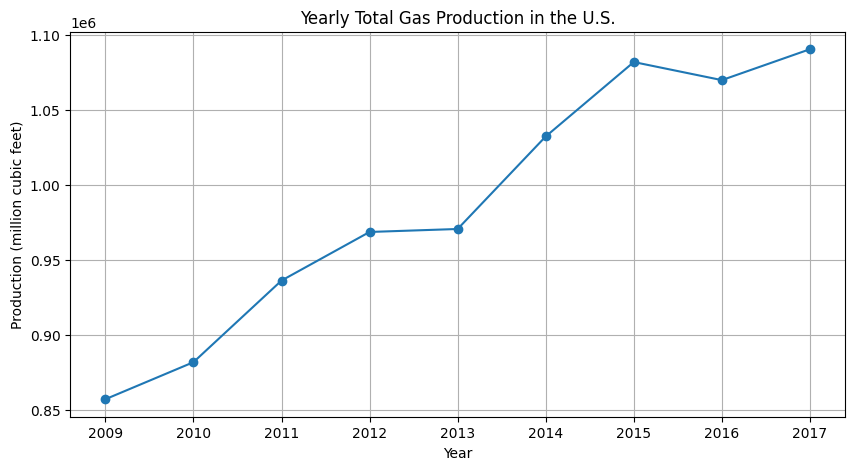

In [27]:
plt.figure(figsize=(10,5))
plt.plot(filtered_yearly_gas_df.index, filtered_yearly_gas_df['U.S.'], marker='o')
plt.title('Yearly Total Gas Production in the U.S.')
plt.xlabel('Year')
plt.ylabel('Production (million cubic feet)')
plt.grid(True)
plt.show()


### Yearly Gas Production by Selected States


In [28]:
filtered_yearly_gas_df.columns[1:].sort_values()


Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

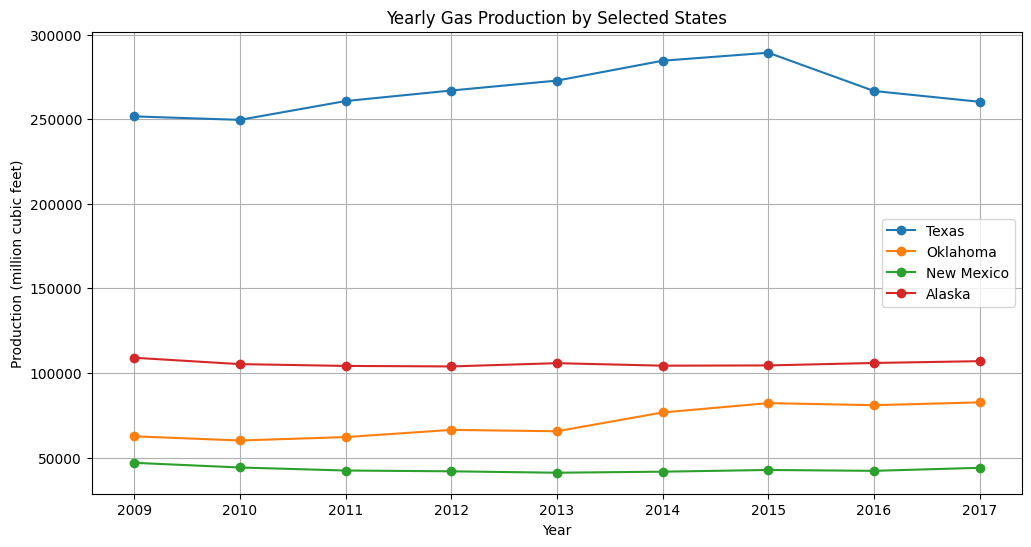

In [29]:

plt.figure(figsize=(12,6))
states = ['Texas', 'Oklahoma', 'New Mexico', 'Alaska']
for state in states:
    plt.plot(filtered_yearly_gas_df.index, filtered_yearly_gas_df[state], marker='o', label=state)
plt.title('Yearly Gas Production by Selected States')
plt.xlabel('Year')
plt.ylabel('Production (million cubic feet)')
plt.grid(True)
plt.legend()
plt.show()


##  Loading Crude Oil Production Data


In [31]:
file_oil = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file_oil, decimal=",")
oil_df.head(5)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


## Inspect the dataframe


In [32]:
oil_df.shape


(121, 36)

In [33]:
oil_df.columns


Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [34]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Month                                      121 non-null    object
 1   U.S. Crude Oil                             121 non-null    int64 
 2   Alabama                                    121 non-null    int64 
 3   Alaska                                     121 non-null    int64 
 4   Arkansas                                   121 non-null    int64 
 5   Arizona                                    121 non-null    int64 
 6   California                                 121 non-null    int64 
 7   Colorado                                   121 non-null    int64 
 8   Federal Offshore Gulf of Mexico Crude Oil  121 non-null    int64 
 9   Federal Offshore Pacific Crude Oil         121 non-null    int64 
 10  Florida                               

## Converting Month column to datetime


In [35]:
oil_df['Month'] = pd.to_datetime(oil_df['Month'])
oil_df['Year'] = oil_df['Month'].dt.year

# Optional: check conversion
oil_df['Month'].dtype


dtype('<M8[ns]')

##  Yearly Crude Oil Production


In [36]:
yearly_oil_df = oil_df.groupby('Year').sum(numeric_only=True)

# Filter only full years (remove 2008 and 2018 if incomplete)
filtered_yearly_oil_df = yearly_oil_df.loc[2009:2017]

filtered_yearly_oil_df.head()


,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
Year,,,,,,,,,,,,,,,,,,,,,
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12
2013,89585,342,6182,218,0,6540,2175,15068,610,72,...,264,3786,174,60,2088,237,0,1152,30475,12


##  Plotting Yearly Total U.S. Crude Oil Production


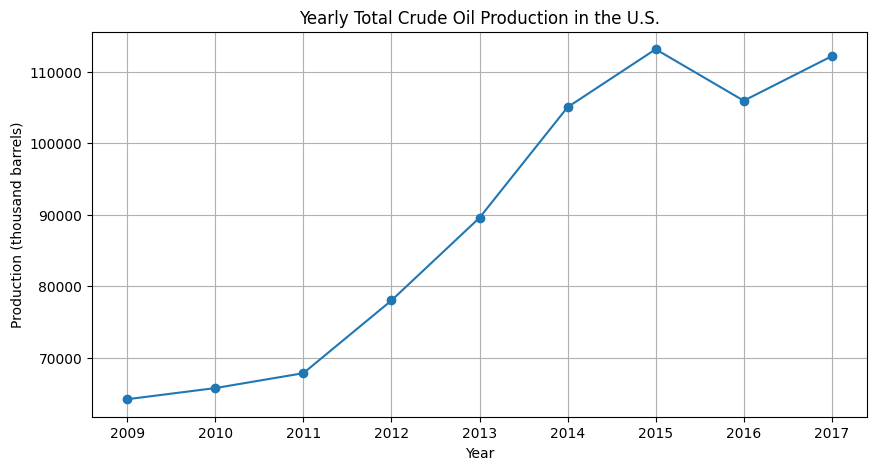

In [38]:

plt.figure(figsize=(10,5))
plt.plot(filtered_yearly_oil_df.index, filtered_yearly_oil_df['U.S. Crude Oil '], marker='o')
plt.title('Yearly Total Crude Oil Production in the U.S.')
plt.xlabel('Year')
plt.ylabel('Production (thousand barrels)')
plt.grid(True)
plt.show()

## Filtered Yearly Crude Oil Production (Full Years)


In [39]:
filtered_yearly_oil_df = yearly_oil_df.iloc[1:-1]  


##  State Production


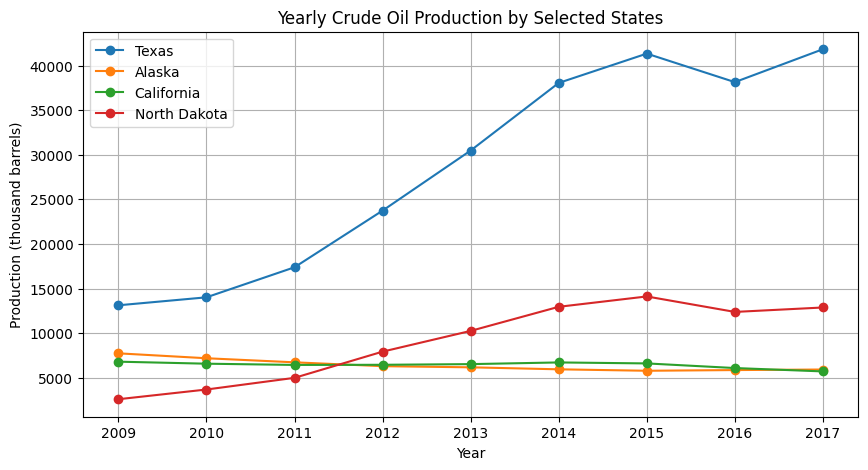

In [40]:
selected_states = ['Texas', 'Alaska', 'California', 'North Dakota']
filtered_yearly_oil_df[selected_states].plot(figsize=(10,5), marker='o')
plt.title('Yearly Crude Oil Production by Selected States')
plt.xlabel('Year')
plt.ylabel('Production (thousand barrels)')
plt.grid(True)
plt.show()


##  Merging Oil and Gas Production



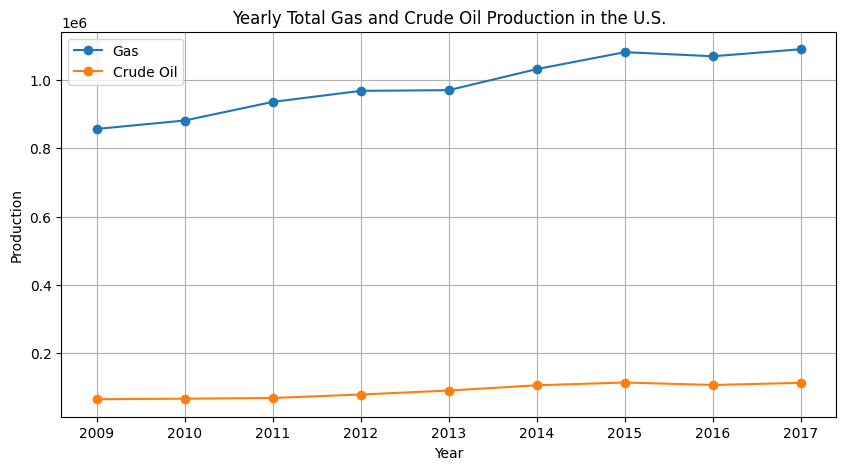

In [42]:
total_gas = filtered_yearly_gas_df[['U.S.']].rename(columns={'U.S.':'Gas'})
total_oil = filtered_yearly_oil_df[['U.S. Crude Oil ']].rename(columns={'U.S. Crude Oil ':'Crude Oil'})  # لاحظ المسافة

merged_df = pd.concat([total_gas, total_oil], axis=1)
merged_df.plot(figsize=(10,5), marker='o')
plt.title('Yearly Total Gas and Crude Oil Production in the U.S.')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)
plt.show()



In [44]:
merged_df.head()


,Gas,Crude Oil
Year,,
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585


In [45]:
merged_df.shape


(9, 2)

## Analysis of U.S. Gas vs Crude Oil Production
This plot shows the yearly total production of natural gas and crude oil in the United States. Observations and trends can be discussed here.


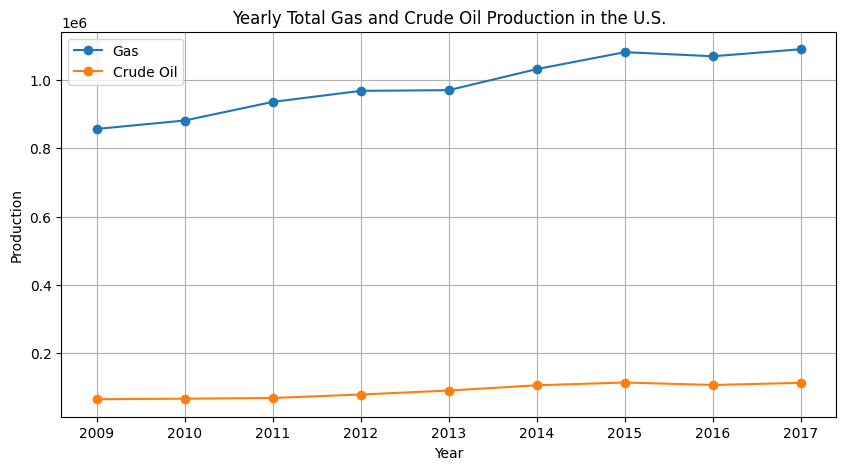

In [46]:
merged_df.plot(figsize=(10,5), marker='o')
plt.title('Yearly Total Gas and Crude Oil Production in the U.S.')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)
plt.show()


In [48]:
from nbresult import ChallengeResult

# مثال لاختبار آخر خطوة
result = ChallengeResult('merged_dataframes',
    merged_df_shape=merged_df.shape,
    yearly_oil_2009=merged_df.iloc[0]["Crude Oil"],
)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/raheil/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/raheil/code/RaheilOt/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2009 PASSED [100%]

============================== 2 passed in 0.24s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master

